# Hw2 of Applied Machine Learning
### Shuai Hao (sh3831)

## Regression on US housing Dataset
The US housing data are available on [Kaggle](https://www.kaggle.com/shree1992/housedata). Data analysts use this dataset to analyze and predict where property prices are moving towards. The goal of this notebook is to predict the ‘price’ column.

## 2.1 Determine which features are continuous vs categorical. Drop rows without a valid sales price.

**Continuous features:**

price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, year_built, year_renovated

**Categorical features:**

date, street, city, statezip, country

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
%cd 'My Drive'/US_house_price

/gdrive/My Drive/US_house_price


In [0]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np   

In [0]:
df = pd.read_csv("US_house_data.csv")

In [0]:
df = df[df['price'] != 0]

In [0]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


## 2.2 Visualize the univariate distribution of each continuous feature, and the distribution of the target. 
Do you notice anything? Is there something that might require special treatment?

**Histogram of each continuous feature and the distribution of the target**

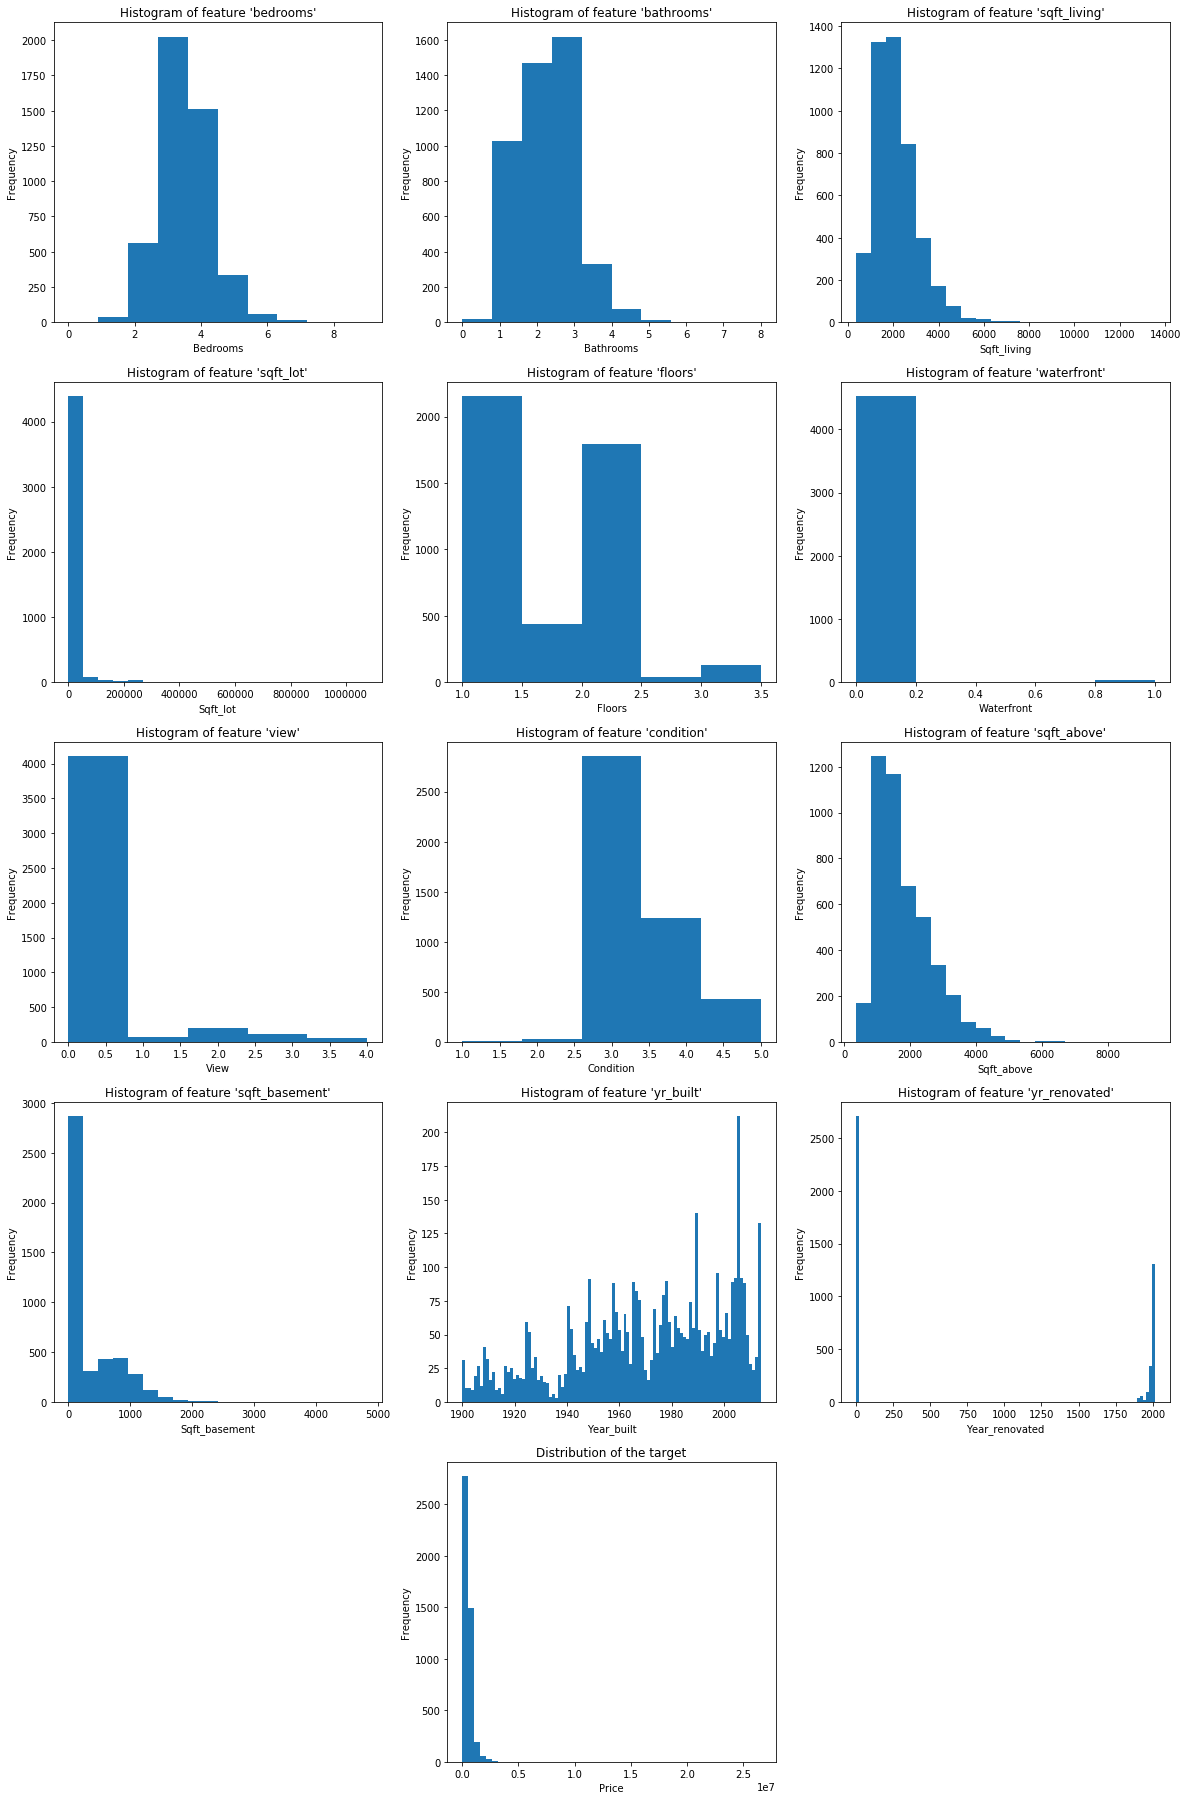

In [0]:
fig, ax = plt.subplots(5, 3, figsize=(20,32))
ax[0][0].hist(x = df["bedrooms"], bins=10)
ax[0][0].set_xlabel("Bedrooms")
ax[0][0].set_ylabel("Frequency")
ax[0][0].title.set_text("Histogram of feature 'bedrooms'")
ax[0][1].hist(x = df["bathrooms"], bins=10)
ax[0][1].set_xlabel("Bathrooms")
ax[0][1].set_ylabel("Frequency")
ax[0][1].title.set_text("Histogram of feature 'bathrooms'")
ax[0][2].hist(x = df["sqft_living"], bins=20)
ax[0][2].set_xlabel("Sqft_living")
ax[0][2].set_ylabel("Frequency")
ax[0][2].title.set_text("Histogram of feature 'sqft_living'")
ax[1][0].hist(x = df["sqft_lot"], bins=20)
ax[1][0].set_xlabel("Sqft_lot")
ax[1][0].set_ylabel("Frequency")
ax[1][0].title.set_text("Histogram of feature 'sqft_lot'")
ax[1][1].hist(x = df["floors"], bins=5)
ax[1][1].set_xlabel("Floors")
ax[1][1].set_ylabel("Frequency")
ax[1][1].title.set_text("Histogram of feature 'floors'")
ax[1][2].hist(x = df["waterfront"], bins=5)
ax[1][2].set_xlabel("Waterfront")
ax[1][2].set_ylabel("Frequency")
ax[1][2].title.set_text("Histogram of feature 'waterfront'")
ax[2][0].hist(x = df["view"], bins=5)
ax[2][0].set_xlabel("View")
ax[2][0].set_ylabel("Frequency")
ax[2][0].title.set_text("Histogram of feature 'view'")
ax[2][1].hist(x = df["condition"], bins=5)
ax[2][1].set_xlabel("Condition")
ax[2][1].set_ylabel("Frequency")
ax[2][1].title.set_text("Histogram of feature 'condition'")
ax[2][2].hist(x = df["sqft_above"], bins=20)
ax[2][2].set_xlabel("Sqft_above")
ax[2][2].set_ylabel("Frequency")
ax[2][2].title.set_text("Histogram of feature 'sqft_above'")
ax[3][0].hist(x = df["sqft_basement"], bins=20)
ax[3][0].set_xlabel("Sqft_basement")
ax[3][0].set_ylabel("Frequency")
ax[3][0].title.set_text("Histogram of feature 'sqft_basement'")
ax[3][1].hist(x = df["yr_built"], bins=100)
ax[3][1].set_xlabel("Year_built")
ax[3][1].set_ylabel("Frequency")
ax[3][1].title.set_text("Histogram of feature 'yr_built'")
ax[3][2].hist(x = df["yr_renovated"], bins=100)
ax[3][2].set_xlabel("Year_renovated")
ax[3][2].set_ylabel("Frequency")
ax[3][2].title.set_text("Histogram of feature 'yr_renovated'")
ax[4][1].hist(x = df["price"], bins=50)
ax[4][1].set_xlabel("Price")
ax[4][1].set_ylabel("Frequency")
ax[4][1].title.set_text("Distribution of the target")
fig.delaxes(ax[4][0])
fig.delaxes(ax[4][2])
plt.show()

**Box plot of each continuous feature**

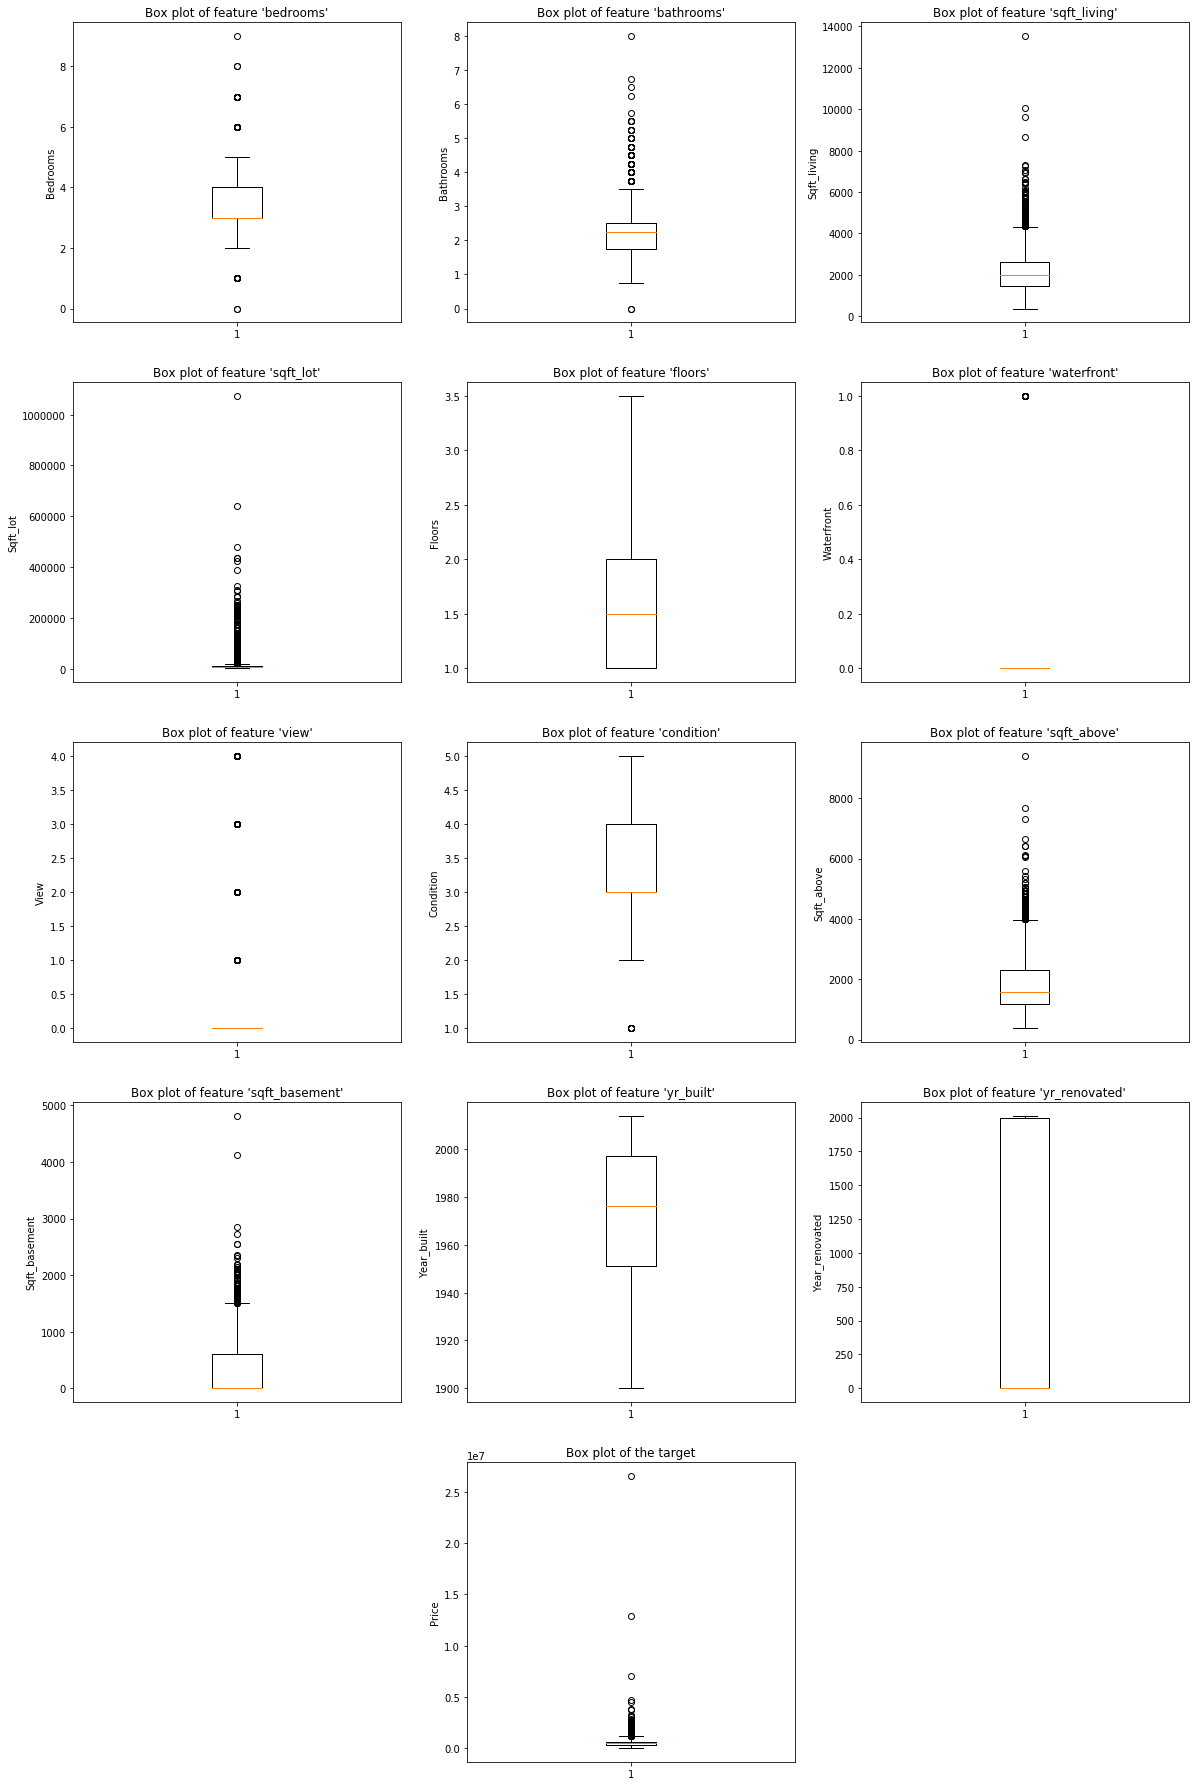

In [0]:
fig, ax = plt.subplots(5, 3, figsize=(20,32))
ax[0][0].boxplot(x = df["bedrooms"])
ax[0][0].set_ylabel("Bedrooms")
ax[0][0].title.set_text("Box plot of feature 'bedrooms'")
ax[0][1].boxplot(x = df["bathrooms"])
ax[0][1].set_ylabel("Bathrooms")
ax[0][1].title.set_text("Box plot of feature 'bathrooms'")
ax[0][2].boxplot(x = df["sqft_living"])
ax[0][2].set_ylabel("Sqft_living")
ax[0][2].title.set_text("Box plot of feature 'sqft_living'")
ax[1][0].boxplot(x = df["sqft_lot"])
ax[1][0].set_ylabel("Sqft_lot")
ax[1][0].title.set_text("Box plot of feature 'sqft_lot'")
ax[1][1].boxplot(x = df["floors"])
ax[1][1].set_ylabel("Floors")
ax[1][1].title.set_text("Box plot of feature 'floors'")
ax[1][2].boxplot(x = df["waterfront"])
ax[1][2].set_ylabel("Waterfront")
ax[1][2].title.set_text("Box plot of feature 'waterfront'")
ax[2][0].boxplot(x = df["view"])
ax[2][0].set_ylabel("View")
ax[2][0].title.set_text("Box plot of feature 'view'")
ax[2][1].boxplot(x = df["condition"])
ax[2][1].set_ylabel("Condition")
ax[2][1].title.set_text("Box plot of feature 'condition'")
ax[2][2].boxplot(x = df["sqft_above"])
ax[2][2].set_ylabel("Sqft_above")
ax[2][2].title.set_text("Box plot of feature 'sqft_above'")
ax[3][0].boxplot(x = df["sqft_basement"])
ax[3][0].set_ylabel("Sqft_basement")
ax[3][0].title.set_text("Box plot of feature 'sqft_basement'")
ax[3][1].boxplot(x = df["yr_built"])
ax[3][1].set_ylabel("Year_built")
ax[3][1].title.set_text("Box plot of feature 'yr_built'")
ax[3][2].boxplot(x = df["yr_renovated"])
ax[3][2].set_ylabel("Year_renovated")
ax[3][2].title.set_text("Box plot of feature 'yr_renovated'")
ax[4][1].boxplot(x = df["price"])
ax[4][1].set_ylabel("Price")
ax[4][1].title.set_text("Box plot of the target")
fig.delaxes(ax[4][0])
fig.delaxes(ax[4][2])
plt.show()

I notice that four features "sqrt_living, "sqrt_lot", "sqrt_above" and "sqrt_basement" and the target "price" are skewed to the left. The feature "waterfront" only has values "0" and "1", and the feature "yr_renovated" has a lot of value "0" because a lot of houses haven't been renovated since it was built. I need to use log transform to the skewed features.

## 2.3 Visualize the dependency of the target on each continuous feature (2d scatter plot).

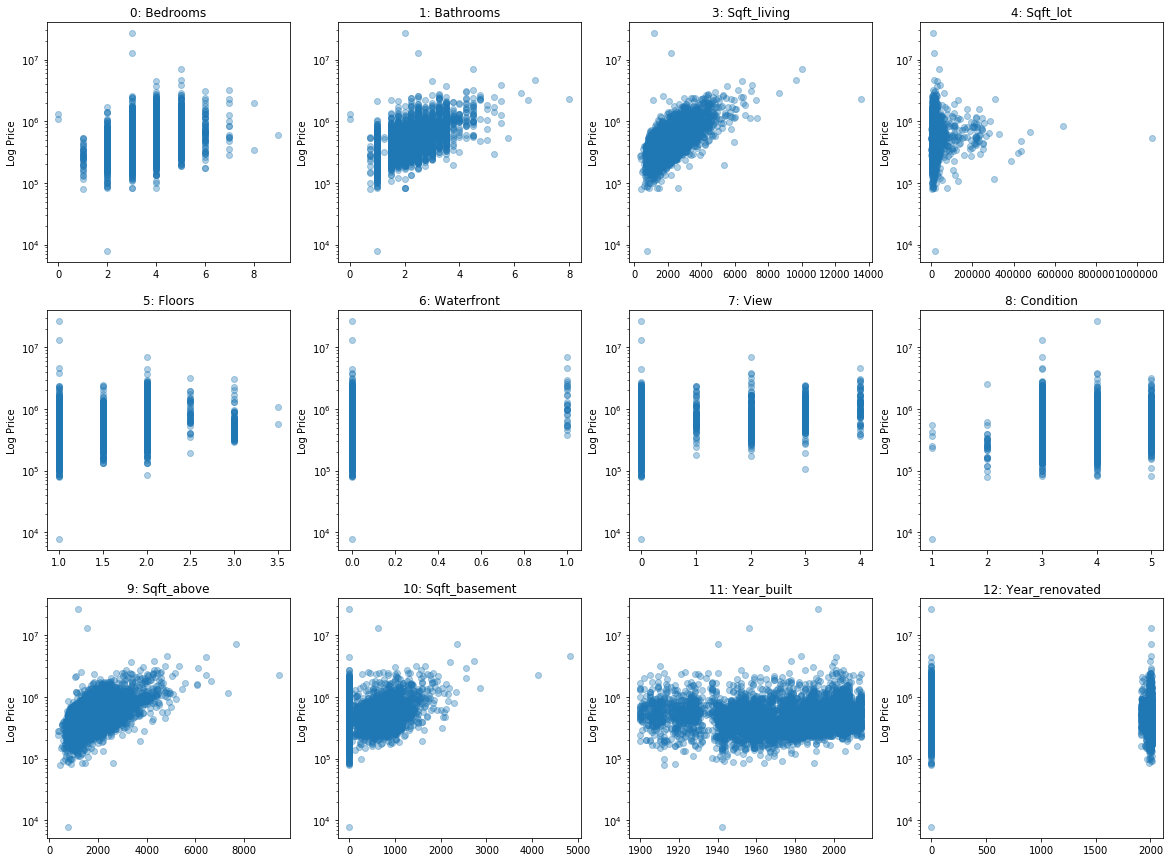

In [0]:
fig, ax = plt.subplots(3, 4, figsize=(20,15))
ax[0][0].scatter(x = df['bedrooms'], y = df['price'], alpha = 0.35)
ax[0][0].set_ylabel("Log Price")
ax[0][0].set_yscale("log")
ax[0][0].set_title("0: Bedrooms")
ax[0][1].scatter(x = df['bathrooms'], y = df['price'], alpha = 0.35)
ax[0][1].set_ylabel("Log Price")
ax[0][1].set_yscale("log")
ax[0][1].set_title("1: Bathrooms")
ax[0][2].scatter(x = df['sqft_living'], y = df['price'], alpha = 0.35)
ax[0][2].set_ylabel("Log Price")
ax[0][2].set_yscale("log")
ax[0][2].set_title("3: Sqft_living")
ax[0][3].scatter(x = df['sqft_lot'], y = df['price'], alpha = 0.35)
ax[0][3].set_ylabel("Log Price")
ax[0][3].set_yscale("log")
ax[0][3].set_title("4: Sqft_lot")
ax[1][0].scatter(x = df['floors'], y = df['price'], alpha = 0.35)
ax[1][0].set_ylabel("Log Price")
ax[1][0].set_yscale("log")
ax[1][0].set_title("5: Floors")
ax[1][1].scatter(x = df['waterfront'], y = df['price'], alpha = 0.35)
ax[1][1].set_ylabel("Log Price")
ax[1][1].set_yscale("log")
ax[1][1].set_title("6: Waterfront")
ax[1][2].scatter(x = df['view'], y = df['price'], alpha = 0.35)
ax[1][2].set_ylabel("Log Price")
ax[1][2].set_yscale("log")
ax[1][2].set_title("7: View")
ax[1][3].scatter(x = df['condition'], y = df['price'], alpha = 0.35)
ax[1][3].set_ylabel("Log Price")
ax[1][3].set_yscale("log")
ax[1][3].set_title("8: Condition")
ax[2][0].scatter(x = df['sqft_above'], y = df['price'], alpha = 0.35)
ax[2][0].set_ylabel("Log Price")
ax[2][0].set_yscale("log")
ax[2][0].set_title("9: Sqft_above")
ax[2][1].scatter(x = df['sqft_basement'], y = df['price'], alpha = 0.35)
ax[2][1].set_ylabel("Log Price")
ax[2][1].set_yscale("log")
ax[2][1].set_title("10: Sqft_basement")
ax[2][2].scatter(x = df['yr_built'], y = df['price'], alpha = 0.35)
ax[2][2].set_ylabel("Log Price")
ax[2][2].set_yscale("log")
ax[2][2].set_title("11: Year_built")
ax[2][3].scatter(x = df['yr_renovated'], y = df['price'], alpha = 0.35)
ax[2][3].set_ylabel("Log Price")
ax[2][3].set_yscale("log")
ax[2][3].set_title("12: Year_renovated")
plt.show()

## 2.4 Split data in training and test set.
Do not use the test-set unless for a final evaluation in 2.5.
Use ColumnTransformer and pipeline to encode categorical variables (your choice of
OneHotEncoder or another one from the categorical_encoder package, or both). Impute missing
values using SimpleImputer. Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet
using cross-validation with the default parameters. Does scaling the data (within the pipeline)
with StandardScaler help? Use the preprocessing that works best going forward.

Drop unnessary columns

In [0]:
y = df['price']

In [0]:
X = df.drop(columns=['date', 'price', 'street', 'country'])

Split the data and try different models

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
categorical = X_train.dtypes == 'object'

In [0]:
preprocess_scale = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(handle_unknown='ignore'), categorical))
preprocess_noscale = make_column_transformer(
    ('passthrough', ~categorical),
    (OneHotEncoder(handle_unknown='ignore'), categorical))

In [0]:
log_lr = TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp)
model_lr = make_pipeline(preprocess_scale, LinearRegression())
model_missing_lr = make_pipeline(preprocess_scale, SimpleImputer(strategy='constant', fill_value=0), LinearRegression())
model_noscale_lr = make_pipeline(preprocess_noscale, LinearRegression())
model_log_lr = make_pipeline(preprocess_scale, log_lr)

In [0]:
scores = cross_val_score(model_lr, X_train, y_train)
np.mean(scores)

0.46074150228019795

In [0]:
scores = cross_val_score(model_missing_lr, X_train, y_train)
np.mean(scores)

0.46074150228019795

In [0]:
scores = cross_val_score(model_noscale_lr, X_train, y_train)
np.mean(scores)

0.4631635597886117

In [0]:
scores = cross_val_score(model_log_lr, X_train, y_train)
np.mean(scores)

-0.2440432054289227

In [0]:
log_ridge = TransformedTargetRegressor(Ridge(), func=np.log, inverse_func=np.exp)
model_ridge = make_pipeline(preprocess_scale, Ridge())
model_missing_ridge = make_pipeline(preprocess_scale, SimpleImputer(strategy='constant', fill_value=0), Ridge())
model_noscale_ridge = make_pipeline(preprocess_noscale, Ridge())
model_log_ridge = make_pipeline(preprocess_scale, log_ridge)

In [0]:
scores = cross_val_score(model_ridge, X_train, y_train)
np.mean(scores)

0.46618173078468417

In [0]:
scores = cross_val_score(model_missing_ridge, X_train, y_train)
np.mean(scores)

0.46618173078468417

In [0]:
scores = cross_val_score(model_noscale_ridge, X_train, y_train)
np.mean(scores)

0.33426723608386033

In [0]:
scores = cross_val_score(model_log_ridge, X_train, y_train)
np.mean(scores)

-0.29508128789894567

In [0]:
log_lasso = TransformedTargetRegressor(Lasso(), func=np.log, inverse_func=np.exp)
model_lasso = make_pipeline(preprocess_scale, Lasso())
model_missing_lasso = make_pipeline(preprocess_scale, SimpleImputer(strategy='constant', fill_value=0), Lasso())
model_noscale_lasso = make_pipeline(preprocess_noscale, Lasso())
model_log_lasso = make_pipeline(preprocess_scale, log_lasso)

In [0]:
scores = cross_val_score(model_lasso, X_train, y_train)
np.mean(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23697111058686.453, tolerance: 47627057395.25078
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188373537477228.44, tolerance: 117153871903.97775
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170058873297825.2, tolerance: 117495785249.67833
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not 

0.46081033183358483

In [0]:
scores = cross_val_score(model_missing_lasso, X_train, y_train)
np.mean(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23697111058686.453, tolerance: 47627057395.25078
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188373537477228.44, tolerance: 117153871903.97775
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170058873297825.2, tolerance: 117495785249.67833
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not 

0.46081033183358483

In [0]:
scores = cross_val_score(model_noscale_lasso, X_train, y_train)
np.mean(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100703845323872.94, tolerance: 47627057395.25078
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321537580530372.44, tolerance: 117153871903.97775
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417043377006185.25, tolerance: 117495785249.67833
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not

0.46081442206496276

In [0]:
scores = cross_val_score(model_log_lasso, X_train, y_train)
np.mean(scores)

-0.03754186990713153

In [0]:
log_elastic = TransformedTargetRegressor(ElasticNet(), func=np.log, inverse_func=np.exp)
model_elastic = make_pipeline(preprocess_scale, ElasticNet())
model_missing_elastic = make_pipeline(preprocess_scale, SimpleImputer(strategy='constant', fill_value=0), ElasticNet())
model_noscale_elastic = make_pipeline(preprocess_noscale, ElasticNet())
model_log_elastic = make_pipeline(preprocess_scale, log_elastic)

In [0]:
scores = cross_val_score(model_elastic, X_train, y_train)
np.mean(scores)

0.36391754127676557

In [0]:
scores = cross_val_score(model_missing_elastic, X_train, y_train)
np.mean(scores)

0.36391754127676557

In [0]:
scores = cross_val_score(model_noscale_elastic, X_train, y_train)
np.mean(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150821508020802.3, tolerance: 47627057395.25078
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 500930237673648.8, tolerance: 117153871903.97775
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 500277443714708.9, tolerance: 117495785249.67833
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not co

0.3751211060768712

In [0]:
scores = cross_val_score(model_log_elastic, X_train, y_train)
np.mean(scores)

-0.03754186990713153

The above experiments show that SimpleInputer won't change the score for the model, because there are no missing values in the dataset. Although the DAT file shows the "yr_renovated" feature has some missing values, the CSV file change those values to 0 because some houses have not been renovated since they were built.

The experiments also show that log transform the dateset will strongly decrease the score of the model.

Scaling doesn't change the score for the linear regression and the lasso model. Scaling slight improves the score for the ElasticNet model but also gives out the convergence warnings. Scaling is really helpful to the ridge model, which increases the score by 0.12 points.

## 2.5 Tune the parameters of the models using GridSearchCV. 
Do the results improve? Visualize the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet.

In [0]:
alpha_space = np.logspace(-3, 3, 13)

In [0]:
pipe = Pipeline([('scaler', preprocess_scale),
                 ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
                 ('regressor', Ridge())])

param_grid = [{'scaler': [preprocess_scale],
               'imputer': [SimpleImputer(strategy='constant', fill_value=0)],
               'regressor': [Ridge()],
               'regressor__alpha': alpha_space,
               },
              {'scaler': [preprocess_scale],
               'imputer': [SimpleImputer(strategy='constant', fill_value=0)],
               'regressor': [Lasso()],
               'regressor__alpha': alpha_space,
               },
              {'scaler': [preprocess_scale],
               'imputer': [SimpleImputer(strategy='constant', fill_value=0)],
               'regressor': [ElasticNet()],
               'regressor__alpha': alpha_space
               # 'regressor__l1_ratio': [0.01, .1, .5, .8, .9, .95, .98, 1]
               }
             ]

In [0]:
grid = GridSearchCV(pipe, param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

In [0]:
grid.score(X_test, y_test)

0.7509475401215875

In [0]:
grid.best_params_

{'imputer': SimpleImputer(add_indicator=False, copy=True, fill_value=0, missing_values=nan,
               strategy='constant', verbose=0),
 'regressor': Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 'regressor__alpha': 10.0,
 'scaler': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('standardscaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True),
                                  bedrooms          True
 bathrooms         True
 sqft_living       True
 sqft_lot          True
 floors            True
 waterfront        True
 view              True
 condition         True
 sqft_above        True
 sqft_basement     True
 yr_built          True
 yr_renovated      True
 city             False
 state...
 dtype: 

In [0]:
def plot_score(name, X, train_score, test_score, train_std, test_std, log=True):
    plt.plot(X, train_score, color='blue', label='mean_train_score')
    plt.fill_between(X, train_score + train_std, train_score - train_std, color='blue', alpha=0.3)
    plt.plot(X, test_score, color='orange', label='mean_test_score')
    plt.fill_between(X, test_score + test_std, test_score - test_std, color='orange', alpha=0.3)
    if log == True:
        plt.xscale("log")
    plt.title(name)
    plt.legend()
    plt.show()

In [0]:
cross_val_train_score = grid.cv_results_['mean_train_score']
cross_val_test_score = grid.cv_results_['mean_test_score']
cross_val_train_std = grid.cv_results_['std_train_score']
cross_val_test_std = grid.cv_results_['std_test_score']

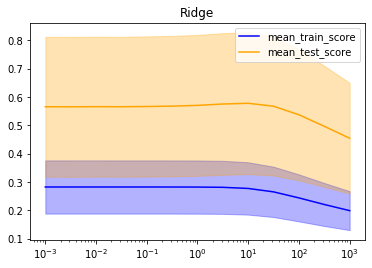

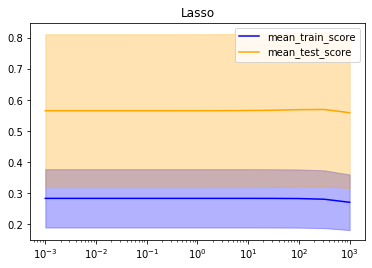

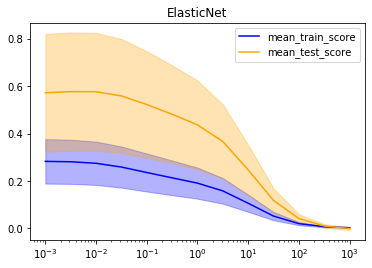

In [0]:
plot_score("Ridge", alpha_space, cross_val_train_score[:13], cross_val_test_score[:13], cross_val_train_std[:13], cross_val_test_std[:13])
plot_score("Lasso", alpha_space, cross_val_train_score[13:26], cross_val_test_score[13:26], cross_val_train_std[13:26], cross_val_test_std[13:26])
plot_score("ElasticNet", alpha_space, cross_val_train_score[26:], cross_val_test_score[26:], cross_val_train_std[26:], cross_val_test_std[26:])

The results improve a lot and the test score is about 0.766.

In [0]:
param_grid_elasticnet = {'scaler': [preprocess_scale],
                        'imputer': [SimpleImputer(strategy='constant', fill_value=0)],
                        'regressor': [ElasticNet()],
                        'regressor__alpha': np.logspace(-4, -1, 10),
                        'regressor__l1_ratio': [0.01, .1, .5, .8, .9, .95, .98, 1]
                        }

In [0]:
grid_elasticnet = GridSearchCV(pipe, param_grid_elasticnet, cv=10, return_train_score=True)
grid_elasticnet.fit(X_train, y_train)

In [0]:
grid_elasticnet.score(X_test, y_test)

0.7499024088009463

In [0]:
grid_elasticnet.best_params_

{'imputer': SimpleImputer(add_indicator=False, copy=True, fill_value=0, missing_values=nan,
               strategy='constant', verbose=0),
 'regressor': ElasticNet(alpha=0.004641588833612777, copy_X=True, fit_intercept=True,
            l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
            precompute=False, random_state=None, selection='cyclic', tol=0.0001,
            warm_start=False),
 'regressor__alpha': 0.004641588833612777,
 'regressor__l1_ratio': 0.5,
 'scaler': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('standardscaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True),
                                  bedrooms          True
 bathrooms         True
 sqft_living       True
 sqft_lot          True
 floors            True
 waterfront        True
 view              

In [0]:
len(grid_elasticnet.cv_results_['mean_test_score'])

80

In [0]:
elasticnet_results = grid_elasticnet.cv_results_['mean_test_score']

In [0]:
elasticnet_results = np.around(np.reshape(elasticnet_results, (8, 10)), decimals=4)

In [0]:
alpha_e_space = np.around(np.logspace(-4, -1, 10), decimals=6)
l1_ratio_space = [0.01, .1, .5, .8, .9, .95, .98, 1]

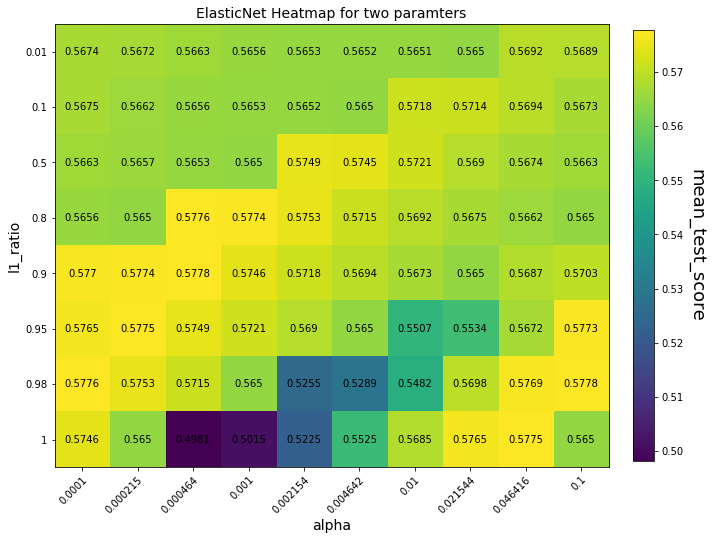

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(elasticnet_results)

ax.set_xticks(np.arange(len(alpha_e_space)))
ax.set_yticks(np.arange(len(l1_ratio_space)))

ax.set_xticklabels(alpha_e_space)
ax.set_yticklabels(l1_ratio_space)

ax.set_xlabel("alpha", fontsize=14)
ax.set_ylabel("l1_ratio", fontsize=14)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(l1_ratio_space)):
    for j in range(len(alpha_e_space)):
        text = ax.text(j, i, elasticnet_results[i, j],
                       ha="center", va="center", color="black")

ax.set_title("ElasticNet Heatmap for two paramters", fontsize=14)

cmap = ax.figure.colorbar(im, ax=ax, fraction=0.036, pad=0.04)
cmap.ax.set_ylabel("mean_test_score", rotation=-90, va="bottom", fontsize=18)

fig.tight_layout()
plt.show()

## 2.6 Visualize the 20 most important coefficients of the resulting models. Do they agree on which features are important?

In [0]:
index_ridge = np.argmax(grid.cv_results_['mean_test_score'][:13])

In [0]:
index_lasso = np.argmax(grid.cv_results_['mean_test_score'][13:26])

In [0]:
optimal_model_ridge = make_pipeline(preprocess_scale, SimpleImputer(strategy='constant', fill_value=0), Ridge(alpha=alpha_space[index_ridge]))
optimal_model_lasso = make_pipeline(preprocess_scale, SimpleImputer(strategy='constant', fill_value=0), Lasso(alpha=alpha_space[index_lasso]))
optimal_model_elasticnet = make_pipeline(preprocess_scale, SimpleImputer(strategy='constant', fill_value=0), ElasticNet(alpha=0.1, l1_ratio=0.98))

In [0]:
optimal_model_ridge.fit(X_train, y_train)
scores = cross_val_score(optimal_model_ridge, X_train, y_train)
np.mean(scores)

0.47331463037900096

In [0]:
optimal_model_lasso.fit(X_train, y_train)
scores = cross_val_score(optimal_model_lasso, X_train, y_train)
np.mean(scores)

0.4649405706300932

In [0]:
optimal_model_elasticnet.fit(X_train, y_train)
scores = cross_val_score(optimal_model_elasticnet, X_train, y_train)
np.mean(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458185546244189.94, tolerance: 125899758221.57161
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109572799200953.47, tolerance: 47627057395.25078
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446363276581695.25, tolerance: 117153871903.97775
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not

0.47244601262372826

In [0]:
category_feature_name = optimal_model_ridge.steps[0][1].transformers_[1][1].get_feature_names(X_train.columns[categorical]).tolist()

In [0]:
continuous_feature_name = X_train.columns[~categorical].tolist()

In [0]:
feature_name = continuous_feature_name + category_feature_name

In [0]:
len(feature_name)

131

In [0]:
ridge_coef = optimal_model_ridge.steps[2][1].coef_
lasso_coef = optimal_model_lasso.steps[2][1].coef_
elasticnet_coef = optimal_model_elasticnet.steps[2][1].coef_

In [0]:
ridge_top20_index = sorted(range(len(ridge_coef)), key=lambda i: abs(ridge_coef[i]), reverse=True)[:20]
lasso_top20_index = sorted(range(len(lasso_coef)), key=lambda i: abs(lasso_coef[i]), reverse=True)[:20]
elasticnet_top20_index = sorted(range(len(elasticnet_coef)), key=lambda i: abs(elasticnet_coef[i]), reverse=True)[:20]

In [0]:
ridge_top20_feature = [feature_name[i] for i in ridge_top20_index]
lasso_top20_feature = [feature_name[i] for i in lasso_top20_index]
elasticnet_top20_feature = [feature_name[i] for i in elasticnet_top20_index]

In [0]:
ridge_coef_20 = [ridge_coef[i] for i in ridge_top20_index]
lasso_coef_20 = [lasso_coef[i] for i in lasso_top20_index]
elasticnet_coef_20 = [elasticnet_coef[i] for i in elasticnet_top20_index]

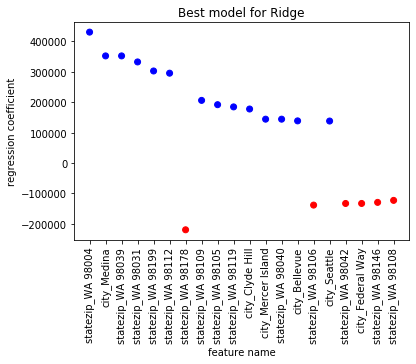

In [0]:
plt.scatter(ridge_top20_feature, ridge_coef_20, c=np.sign(ridge_coef_20), cmap='bwr_r')
plt.xticks(rotation='vertical')
plt.xlabel("feature name")
plt.ylabel("regression coefficient")
plt.title("Best model for Ridge")
plt.show()

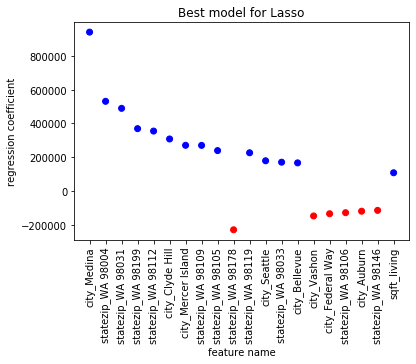

In [0]:
plt.scatter(lasso_top20_feature, lasso_coef_20, c=np.sign(lasso_coef_20), cmap='bwr_r')
plt.xticks(rotation='vertical')
plt.xlabel("feature name")
plt.ylabel("regression coefficient")
plt.title("Best model for Lasso")
plt.show()

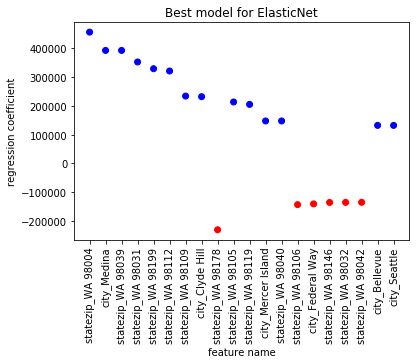

In [0]:
plt.scatter(elasticnet_top20_feature, elasticnet_coef_20, c=np.sign(elasticnet_coef_20), cmap='bwr_r')
plt.xticks(rotation='vertical')
plt.xlabel("feature name")
plt.ylabel("regression coefficient")
plt.title("Best model for ElasticNet")
plt.show()

The three models don't agree on which features are the most important, but the zipcode 98031 and 98004 and the city Medina are always in the top four features or all three models. The Ridge model and the ElasticNet model focus more on categorical features, because all the top 20 features are categorical. The Lasso model have one continuous feature in the top 20.